In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
ecommerce = pd.read_csv('/content/ecommerce_product_dataset.csv')

In [33]:
ecommerce.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [34]:
#lets check for missing values
ecommerce.isnull().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [35]:
#lets  check for duplicates
ecommerce.duplicated().sum()

0

In [36]:
#statistical description of our data
ecommerce.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000


<Axes: >

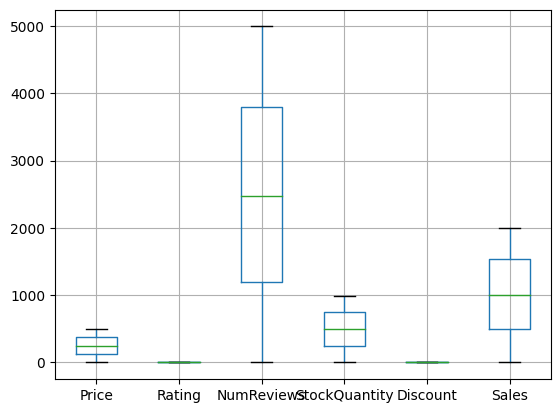

In [78]:
#check for outliers
ecommerce.boxplot(['Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales'])

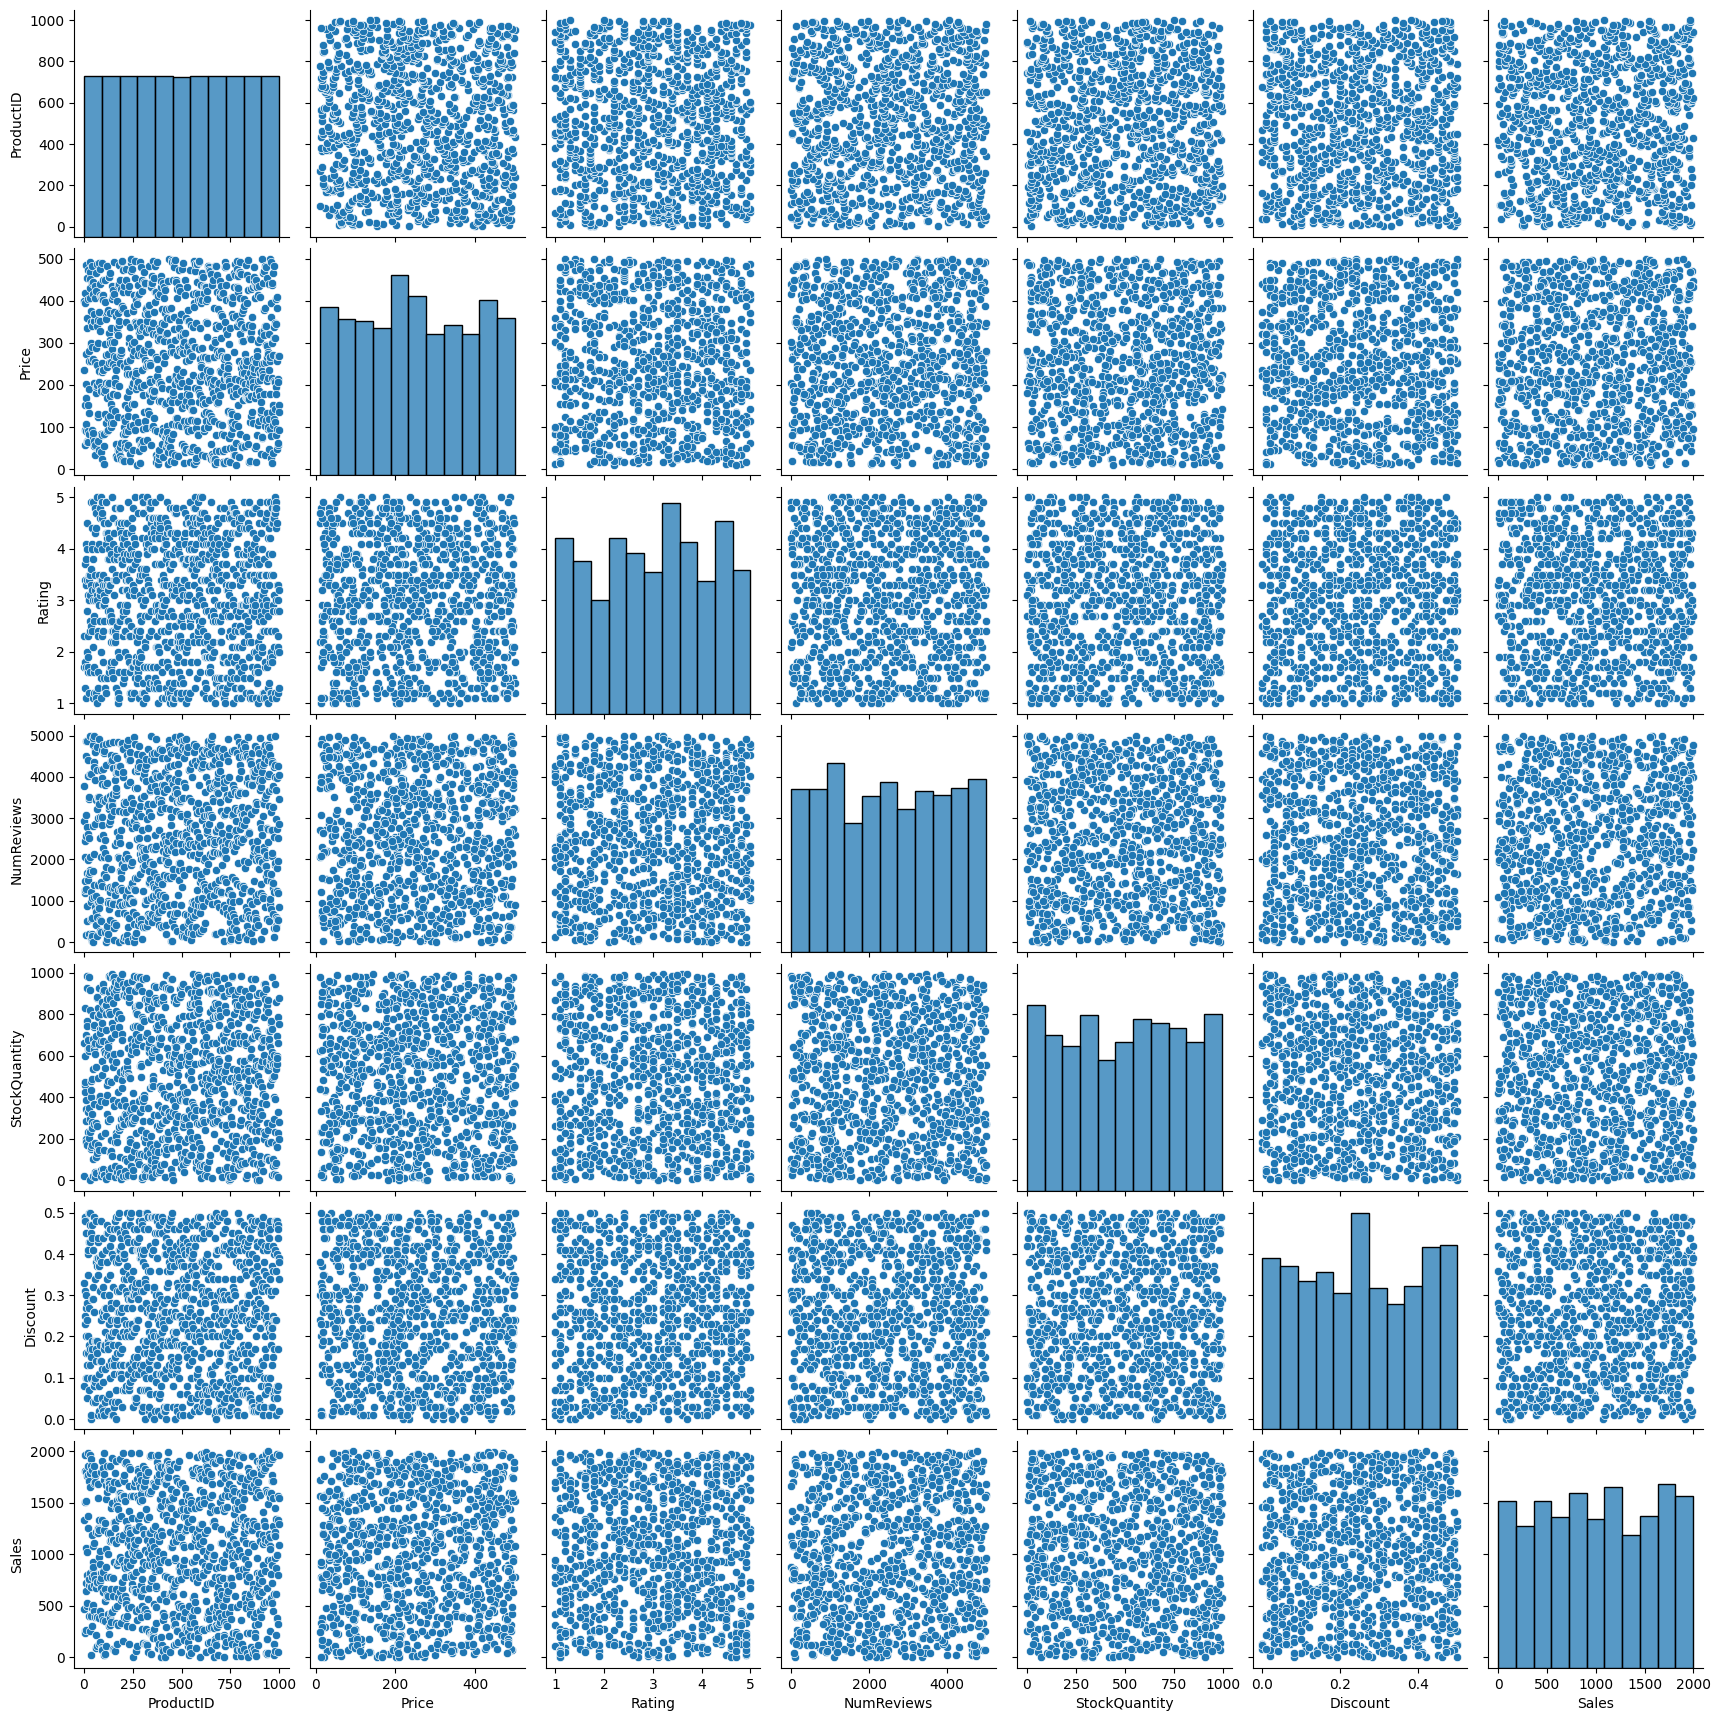

In [37]:
sns.pairplot(data = ecommerce)

In [38]:
ecommerce.columns

Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded', 'City'],
      dtype='object')

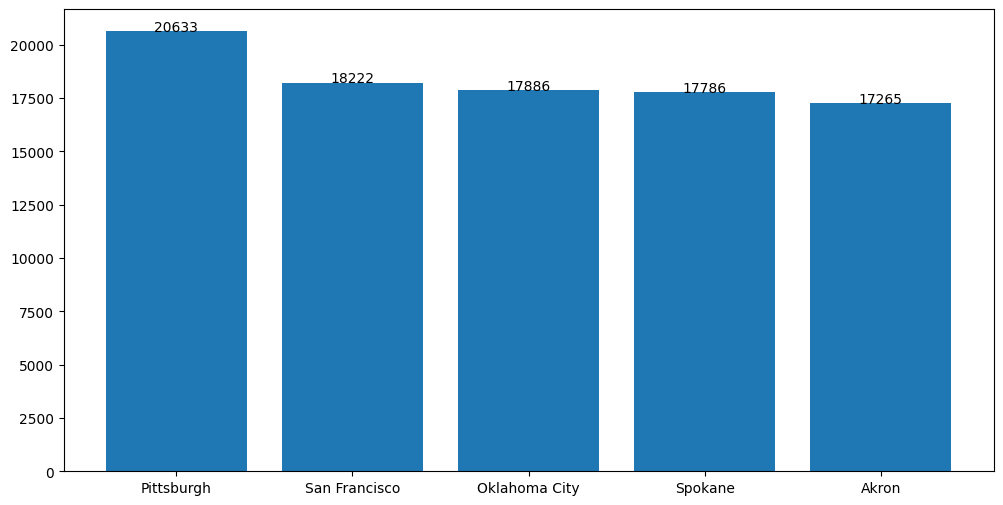

In [39]:
citybysales = ecommerce.groupby('City')['Sales'].sum().sort_values(ascending = False).head(5)
plt.figure(figsize = (12,6))
from operator import index

plt.bar(citybysales.index, citybysales.values)

for i in range(len(citybysales.index)):
  plt.text(i, citybysales.values[i], f'{round(citybysales.values[i])}', ha = 'center')

In [40]:
ecommerce['Category'].nunique()

25

In [41]:
salesbycategory = ecommerce.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)

salesbycategory

Category
Bedsheets                     46631
Art and crafting materials    45912
Motor vehicle parts           45116
Vitamins and supplements      44402
Mobile phone accessories      43660
Name: Sales, dtype: int64

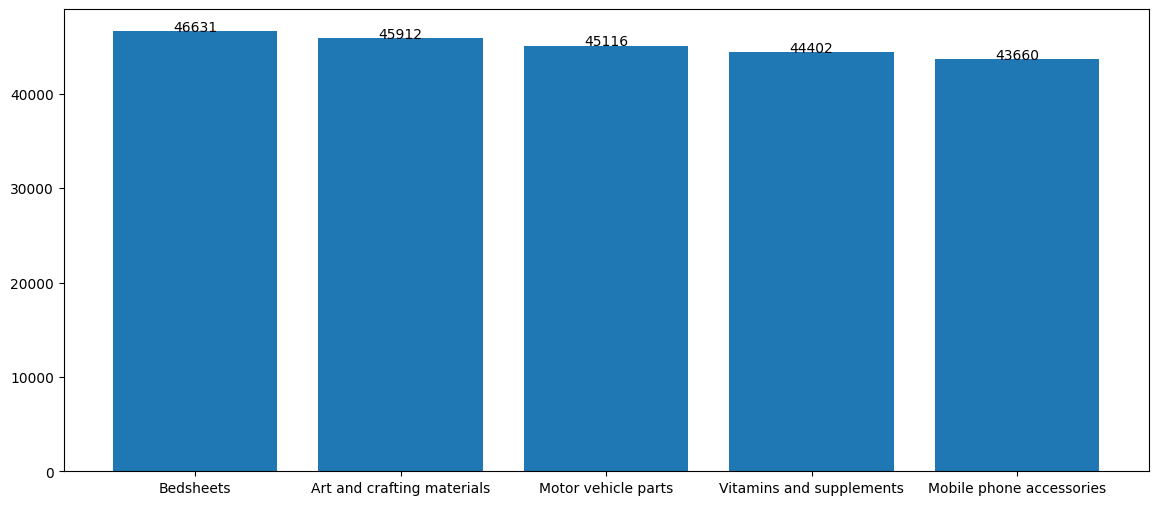

In [42]:
from operator import index
plt.figure(figsize=(14,6))

plt.bar(salesbycategory.index, salesbycategory.values)

for i in range(len(salesbycategory.index)):
  plt.text(i, salesbycategory.values[i], f'{round(salesbycategory.values[i])}', ha = 'center')

In [43]:
ecommerce.groupby('ProductName')['Sales'].sum().sort_values()

ProductName
Pillar Candle      2807
Winter Coat        3664
Rain Jacket        4690
Fantasy Book       4968
Sparkling Wine     5375
                  ...  
Throw Blanket     15315
Spark Plugs       15745
Cleanser          15886
Mountain Bike     20069
Biography         23947
Name: Sales, Length: 100, dtype: int64

In [44]:
ecommerce['ProductName'].nunique()

100

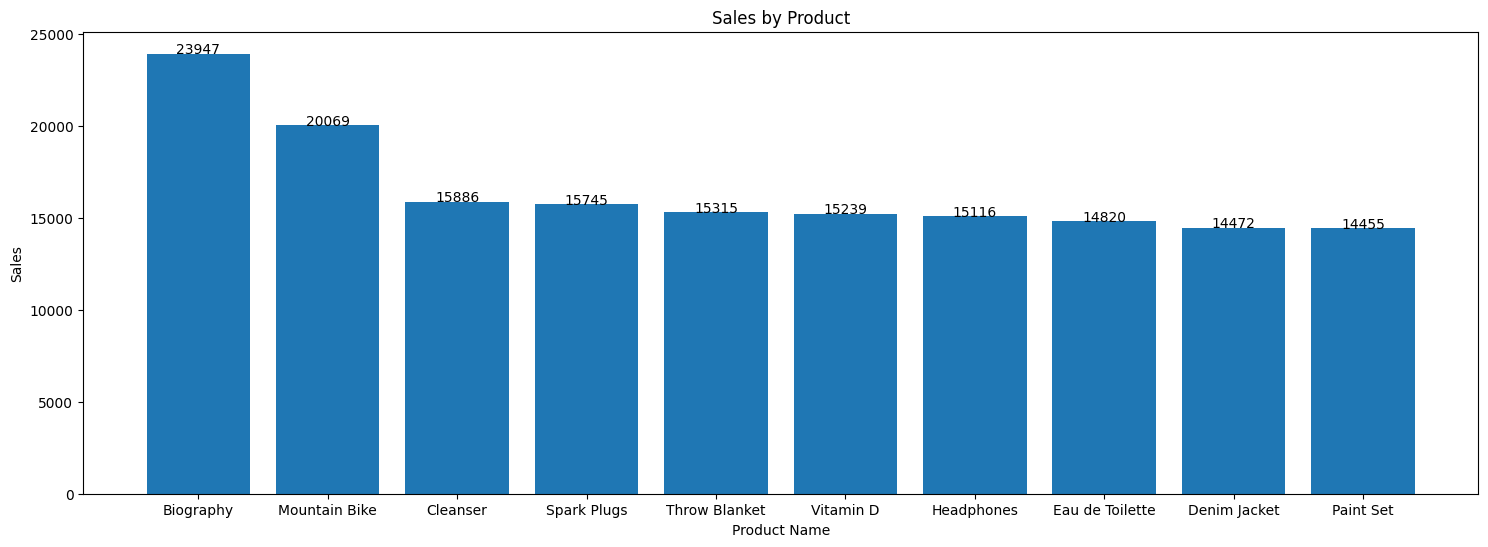

In [45]:
salesbyproduct =ecommerce.groupby('ProductName')['Sales'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (18,6))

from operator import index

plt.bar(salesbyproduct.index, salesbyproduct.values)

for i in range(len(salesbyproduct.index)):
  plt.text(i,salesbyproduct.values[i],f'{round(salesbyproduct.values[i])}', ha = 'center')

  plt.title('Sales by Product')
  plt.xlabel('Product Name')
  plt.ylabel('Sales')

In [46]:
ecommerce['DateAdded'].max()

'2024-06-11'

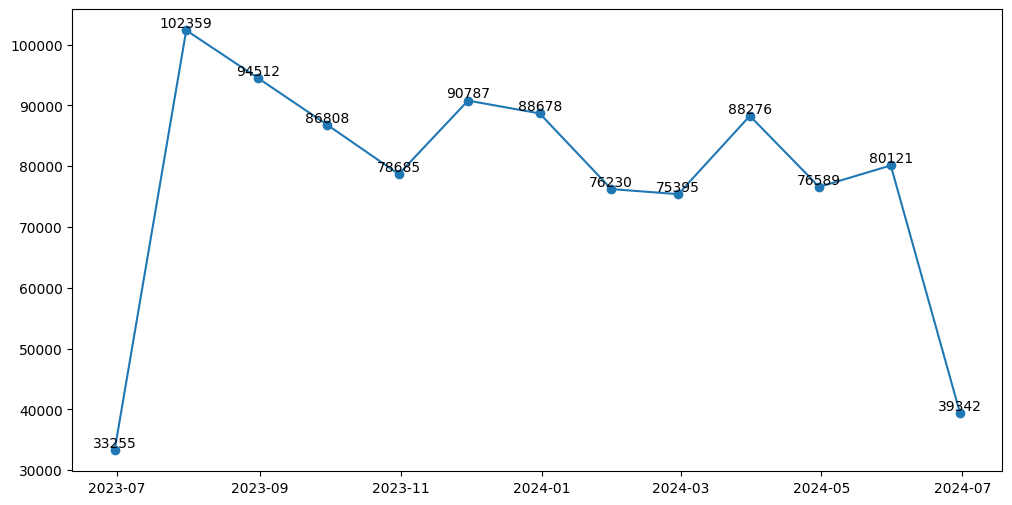

In [54]:
#Lets check sales by month
#first make sure the date field is converted to date

ecommerce['date'] = pd.to_datetime(ecommerce['DateAdded'])

#Group by month and year and sum the sales

salesbymonth = ecommerce.groupby(pd.Grouper(key = 'date', freq='M'))['Sales'].sum()

from operator import index

plt.figure(figsize = (12,6))
plt.plot(salesbymonth.index,salesbymonth.values, marker = 'o')

for date , sales in salesbymonth.items():
  plt.text(date, sales, f'{sales}',ha = 'center', va = 'bottom')

**Linear regression**

In [55]:
ecommerce.columns

Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded', 'City', 'date'],
      dtype='object')

In [56]:
X = ecommerce[['Price', 'Rating', 'NumReviews', 'StockQuantity', 'Discount']]
y = ecommerce['Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [58]:
predict = lm.predict(X_test)

In [61]:
coeff = lm.coef_

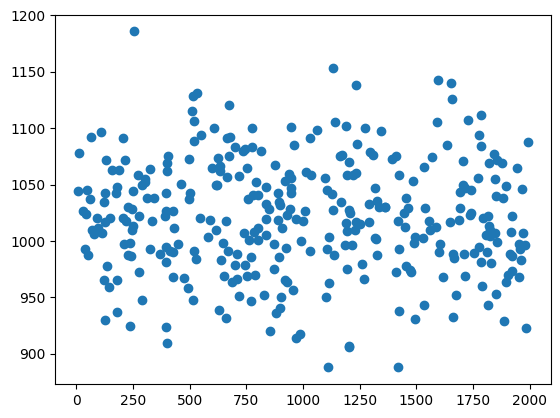

In [69]:
plt.scatter(y_test, predict)


In [74]:
from sklearn import metrics

print('MAE IS:',metrics.mean_absolute_error(y_test,predict))

MAE IS: 498.25651802893617


In [75]:
print('MSE is:', np.sqrt(metrics.mean_absolute_error(y_test, predict)))

MSE is: 22.321660288359737


In [68]:
data = pd.DataFrame(coeff, X.columns,columns=['coeff'])

data

,coeff
Price,0.233793
Rating,-1.284151
NumReviews,0.017490
StockQuantity,-0.104137
Discount,63.652116


Every 1 unit increase in price it is associated with increase in sales by 0.233793 assuming all other features remain constant

Every 1 unit increase in rating is associated with a decrease in sales by 1.284151 assuming all other features remain constant

Every 1 unit increase in Numreviews is associated with an increase in sales by 0.017490 assuming all other features remian consant

Every 1 unit increase in stockquantity is associated with a decrease in sales by 0.104137 assuming all other features remain constant

Every 1 unit increase in discount isassociated with 63.652116 increase in sales assuming all oter features remain constant. Discount in this case heavily impacts sales